
# Linear Regression Assignment

Congratulations! You just got some contract work with an Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data.

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats

sns.set(color_codes=True, style='ticks')

In [2]:
import warnings
warnings.filterwarnings('ignore')

# customize view so we can display graphs side by side when needed
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
data = pd.read_csv('Ecommerce.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

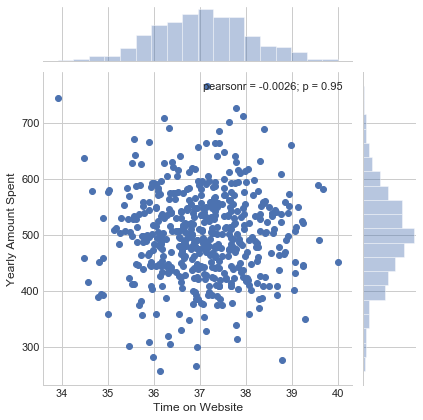

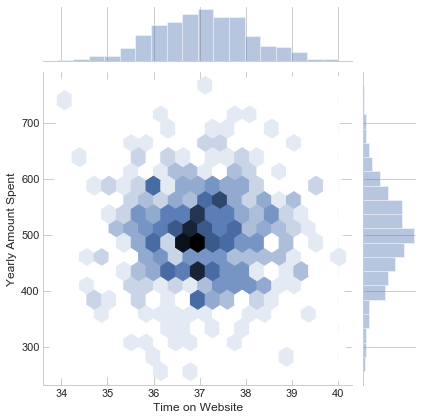

In [62]:
timeOnWebsite = data['Time on Website']
yearlyAmountSpent = data['Yearly Amount Spent']

# scatter
j1 = sns.jointplot(timeOnWebsite, yearlyAmountSpent)
j1.annotate(stats.pearsonr)
# just for fun, check hex as well
j2 = sns.jointplot(timeOnWebsite, yearlyAmountSpent, kind="hex")

** Do the same but with the Time on App column instead. **

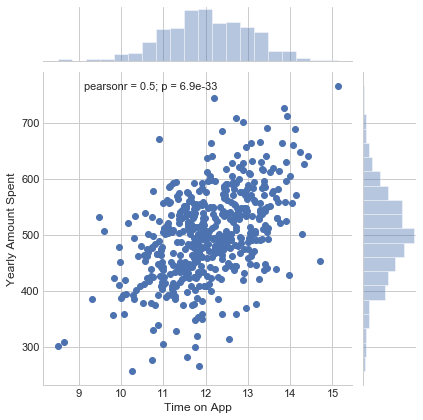

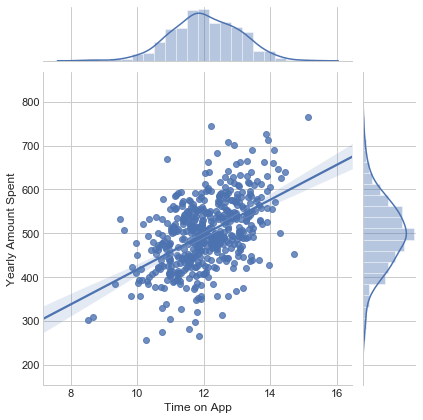

In [63]:
timeOnApp = data['Time on App']
j1 = sns.jointplot(timeOnApp, yearlyAmountSpent)
j1.annotate(stats.pearsonr)
j2 = sns.jointplot(timeOnApp, yearlyAmountSpent, kind="reg")

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

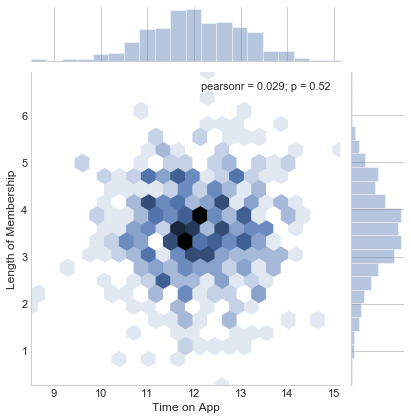

In [64]:
lengthOfMembership = data['Length of Membership']
j = sns.jointplot(timeOnApp, lengthOfMembership, kind="hex")
j.annotate(stats.pearsonr)

**Let's explore correlation across the entire data set. Use [heatmap](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/) to create the chart which represents correlation between each columns.(Don't worry about the the colors)**

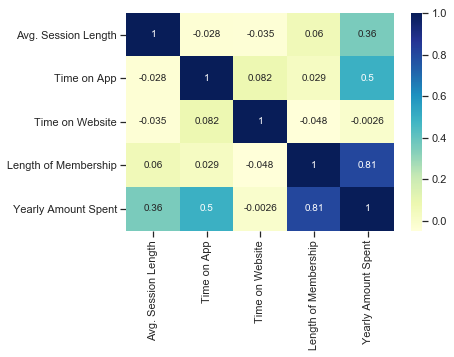

In [10]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [11]:
# Answer: Year of Membership has a correlation 0.81 with Yearly Amount Spent

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

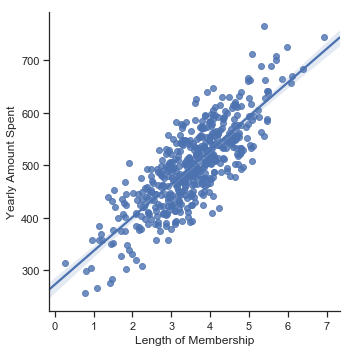

In [12]:
sns.lmplot(data=data, x='Length of Membership', y='Yearly Amount Spent')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [13]:
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
X = data[features]
y = data['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [15]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [16]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [17]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [18]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [19]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0.5,1,'Real test values vs predicted values')

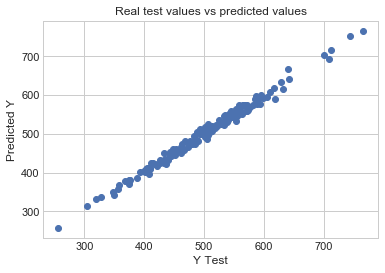

In [44]:
plt.style.use('seaborn-whitegrid')
# Doc says .plot is faster than .scatter for same-size markers
# Therefore it's a better habit to use .plot
# https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.plot(y_test, predictions, 'o')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Real test values vs predicted values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [46]:
# MAE: 7.22814865343
# MSE: 79.813051651
# RMSE: 8.93381506698

from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 7.228148653430838
MSE : 79.81305165097461
RMSE : 8.933815066978642


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

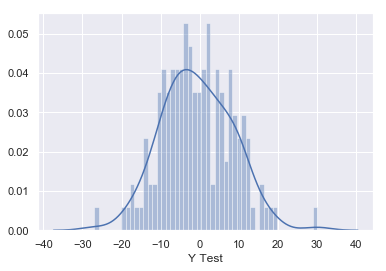

In [80]:
residuals = y_test - predictions
sns.distplot(residuals, bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [87]:
print('intercept_', lm.intercept_)
print('features: ', features)
print('coef_', lm.coef_)

intercept_ -1047.9327822502385
features:  ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
coef_ [25.98154972 38.59015875  0.19040528 61.27909654]


,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [88]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
coeff

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Holding all other features fixed, ...

- a 1 unit increase in __Avg. Session Length__ is associated with an __increase of $25.98 yearly spent__.

- a 1 unit increase in __Time on App__ is associated with an __increase of $38.59 yearly spent__.

- a 1 unit increase in __Time on Website__ is associated with an __increase of $0.19 yearly spent__.

- a 1 unit increase in __Length of Membership__ is associated with an __increase of $61.28 yearly spent__.


**Do you think the company should focus more on their mobile app or on their website?**

__Answer: mobile app!__

For every 1 unit increase, Time on App provides a HUGE return compraed to Time on Website: 200x as effective.

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.